# Fair Bayesian Network Implementation

In this notebook, a fair bayesian network implementation is performed.

## Imports

In [1]:
import pandas as pd
import sys
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, balanced_accuracy_score, roc_curve
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.5f' % x)
label_encoder = LabelEncoder()

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

from forseti.datproc import translate_categorical
from forseti.bayesnet import latentLabelClassifier

C:\tools\Anaconda3\envs\forseti\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\tools\Anaconda3\envs\forseti\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


## Clean Data and Train Bayesian Network

In [2]:
df = pd.read_csv('data/adult.csv')
sensitives = ['gender', 'race']
label = 'income'

train = df[:30000]
test = df[30000:]

clf = latentLabelClassifier(
    train,
    sensitives,
    label,
    atol=0.01,
    classes=2
)

clf.load('trained-models/fair_model_30000.sav')

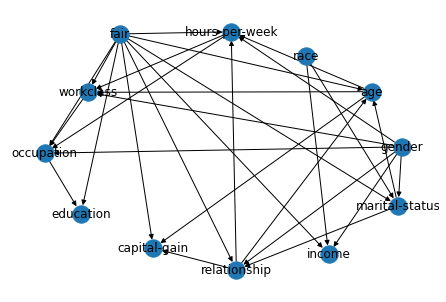

In [3]:
import networkx as nx
import pylab as plt

nx.draw(clf.model, with_labels=True)
plt.show()

## Predict on new data

In [4]:
tmp, _ = translate_categorical(test);
y = tmp['income'];
tmp = tmp.drop('income', axis=1);

c:\gits\Forseti\forseti\datproc.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[obj] = dataframe[obj].astype('category')
c:\gits\Forseti\forseti\datproc.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[obj] = dataframe[obj].astype('category')
c:\gits\Forseti\forseti\datproc.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [ ]:
y_pred = clf.predict_probability(tmp)

# Replace NA with prior prediction
naindexes = y_pred.isna().any(axis=1)
y_pred[naindexes] = 0
y_pred.to_csv('results/y_pred_probability.csv')

## Save Predictions to File

In [79]:
y_pred_label_fair = (y_pred['fair_0'] >= 0.5).astype('int')
y_pred_label_fair.to_csv('results/y_pred_label_fair.csv')

y_pred_label_fair = (y_pred['income_1'] >= 0.5).astype('int')
y_pred_label_fair.to_csv('results/y_pred_label_income.csv')

# Naive Bayes with sensitive attributes

In [10]:
tmp_train, codes_train = translate_categorical(train.copy(deep=True))

from pgmpy.models import NaiveBayes

model = NaiveBayes()
model.fit(tmp_train, 'income')

## Predict and save predictions

In [15]:
y_pred_naive = model.predict(tmp)
y_pred_naive.to_csv('results/y_pred_label_naive_bayes_sensitive.csv')
y_pred_prob_naive = model.predict_probability(tmp)
y_pred_prob_naive.to_csv('results/y_pred_probability_naive_bayes_sensitive.csv')

100%|██████████| 10925/10925 [02:03<00:00, 88.56it/s] 
C:\tools\Anaconda3\envs\forseti\lib\site-packages\pgmpy\models\BayesianNetwork.py:744: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return data.merge(data_with_results, how="left").loc[:, missing_variables]


# Naive Bayes without sensitive attributes

In [26]:
tmp_train, codes_train = translate_categorical(train.copy(deep=True))
tmp_train = tmp_train.drop(sensitives, axis=1)

from pgmpy.models import NaiveBayes

model = NaiveBayes()
model.fit(tmp_train, 'income')

## Predict and save predictions

In [28]:
tmp = tmp.drop(sensitives, axis=1)
y_pred_naive = model.predict(tmp)
y_pred_naive.to_csv('results/y_pred_label_naive_bayes.csv')
y_pred_prob_naive = model.predict_probability(tmp)
y_pred_prob_naive.to_csv('results/y_pred_probability_naive_bayes.csv')

100%|██████████| 9195/9195 [01:08<00:00, 134.10it/s]
C:\tools\Anaconda3\envs\forseti\lib\site-packages\pgmpy\models\BayesianNetwork.py:744: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return data.merge(data_with_results, how="left").loc[:, missing_variables]
